# Devoir 6
**Raphaël Blaude - 55112200**

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from pymatgen.io.cif import CifParser
from pymatgen.ext.matproj import MPRester
import pymatgen.analysis.diffraction.xrd as xrd

In [2]:
mp_key = "NKfarLsNHvBTHM4FxxhUlnMjaXDHo7fy"
mp_id = "mp-22473"

In [3]:
with MPRester(mp_key) as m:
    primitive_structure = m.get_structure_by_material_id(mp_id)
    conventionnelle_structure = SpacegroupAnalyzer(primitive_structure).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Mon travail

In [4]:
calculateur = xrd.XRDCalculator(1.5406)
data = calculateur.get_pattern(conventionnelle_structure) # Liste avec les angles et l'intensité normalisée des pics
hkl_indices = data.hkls # Liste avec les indices et la mulitplicité des plans
hkl_distance = data.d_hkls # Liste avec les distances entre les plans

Les distances interatomiques dans un solide sont de l'ordre de 1 à 2 Å. Dans ce travail, nous bombardons un élément avec des ondes électromagnétiques de longueur d'onde 1.5406 Å (correspondant à la longueur d'onde des rayons X.) Lorsqu'on envoie ces rayons X sur le cristal, des phénomènes d'interférences constructives ou destructives vont avoir lieu.

En fonction de l'angle 2θ entre les directions d'incidence et d'observations, on observera différents pics d'intensité différente, liés à différents plans. On peut observer sur les graphes ci-dessous que l'intensité des pics a tendance à plutôt diminuer quand θ augmente. Cela est dû au facteur de forme atomique, la diffusion étant moins en phase plus θ augmente. L'intensité est normalisée par rapport au plus haut pic du diffractogramme sur les graphes ci-après.

Pour observer un pic, il faut que les interférences soient constructives. Pour ce, il faut que la condition de Bragg soit respectée: nλ = 2dsin(θ) (où n est appelé l'ordre de la réflexion.)

En plus des indices de Miller (h,k,l), un quatrième indice redondant de Miller est introduit, le -i-. Il désigne la famille de plans (h,k,i,l). $i = -(h + k)$

La somme des ondes diffusées se décompose en une partie due au réseau et une autre due à la maille. La partie associée au réseau détermine la position des pics. La partie associée à la maille diminue l'intensité des pics de Bragg à cause des interférences entre les ondes diffusées par les atomes de la maille. Dans certains cas, ces interférences sont telles que l'intensité est nulle, on parle alors d'extinction systématique.



In [5]:
print("Informations sur les trois premiers pics du diffractogramme:\n\n")
print("1er  pic\n2θ = " + f"{round(data.x[0], 4)}°\nDistance entre les plans: {hkl_distance[0]} Å\nIndices (h,k,i,l): {hkl_indices[0][0]['hkl']}\nMultiplicité des plans: {hkl_indices[0][0]['multiplicity']}\nIntensité: {round(data.y[0],6)} %\n")
print("2ème pic\n2θ = " + f"{round(data.x[1], 4)}°\nDistance entre les plans: {hkl_distance[1]} Å\nIndices (h,k,i,l): {hkl_indices[1][0]['hkl']}\nMultiplicité des plans: {hkl_indices[1][0]['multiplicity']}\nIntensité: {round(data.y[1],6)} %\n")
print("3ème pic\n2θ = " + f"{round(data.x[2], 4)}°\nDistance entre les plans: {hkl_distance[2]} Å\nIndices (h,k,i,l): {hkl_indices[2][0]['hkl']}\nMultiplicité des plans: {hkl_indices[2][0]['multiplicity']}\nIntensité: {round(data.y[2],6)} %\n")

Informations sur les trois premiers pics du diffractogramme:


1er  pic
2θ = 12.7219°
Distance entre les plans: 6.952691487852369 Å
Indices (h,k,i,l): (0, 0, 0, 3)
Multiplicité des plans: 2
Intensité: 44.647506 %

2ème pic
2θ = 25.6041°
Distance entre les plans: 3.4763457439261845 Å
Indices (h,k,i,l): (0, 0, 0, 6)
Multiplicité des plans: 2
Intensité: 0.048369 %

3ème pic
2θ = 26.0745°
Distance entre les plans: 3.4146797372644855 Å
Indices (h,k,i,l): (1, 0, -1, 1)
Multiplicité des plans: 12
Intensité: 12.130565 %



### Diffractogramme complet du $NaInSe_2$


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

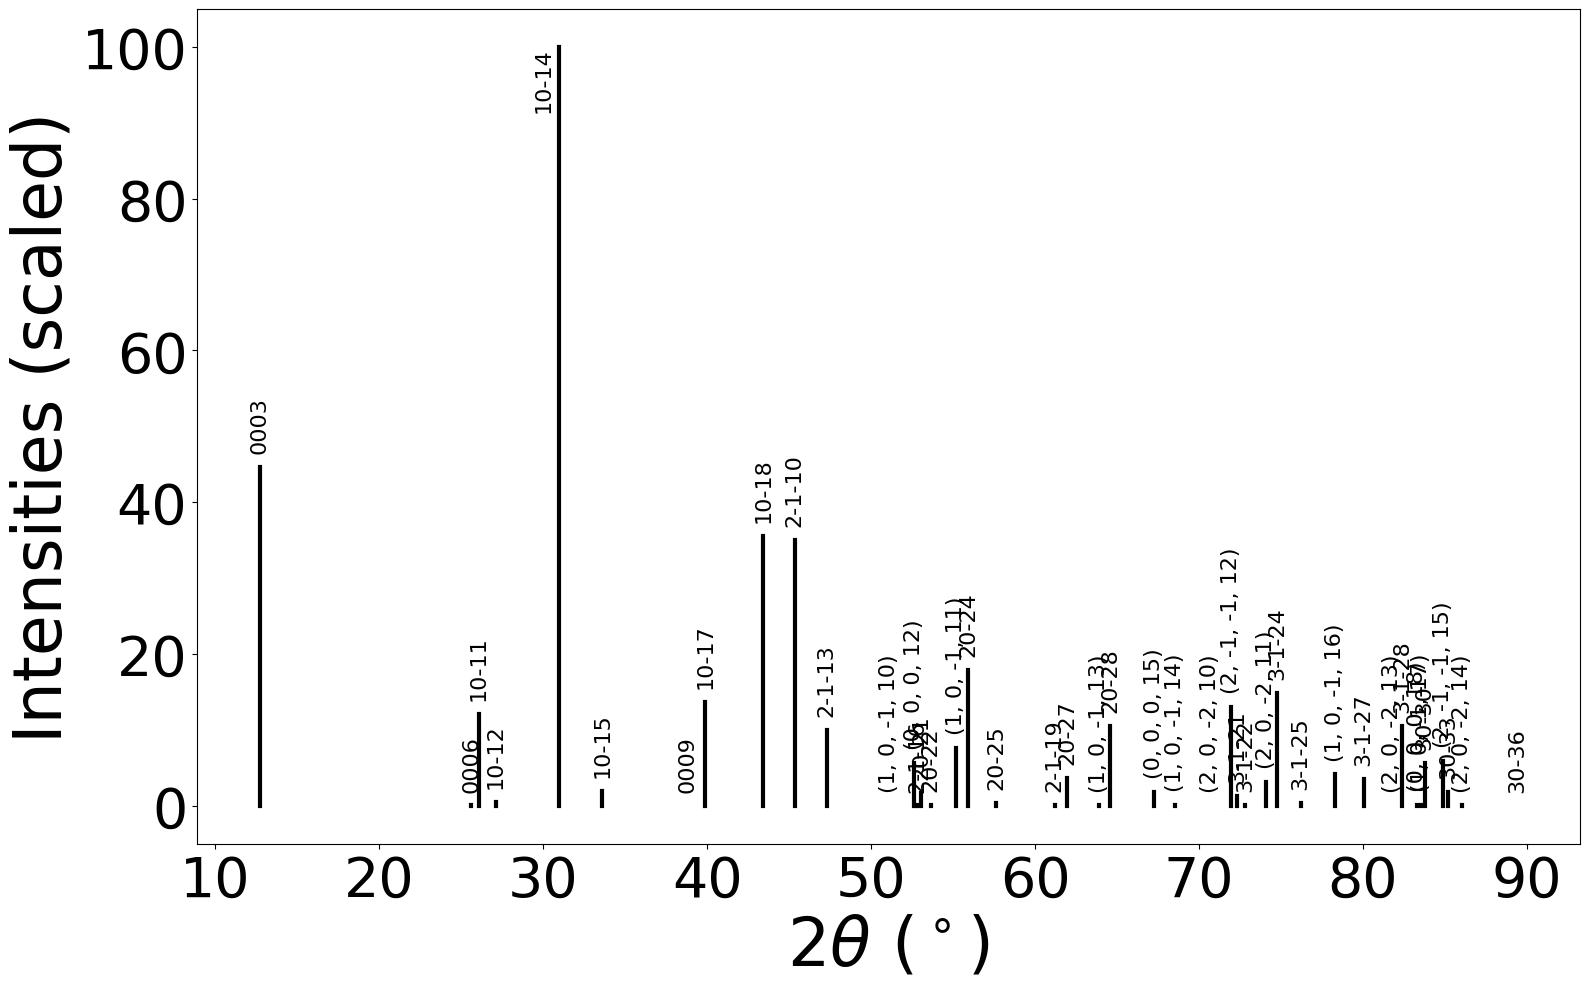

In [6]:
calculateur.get_plot(conventionnelle_structure)

### Les trois premiers pics du $NaInSe_2$

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

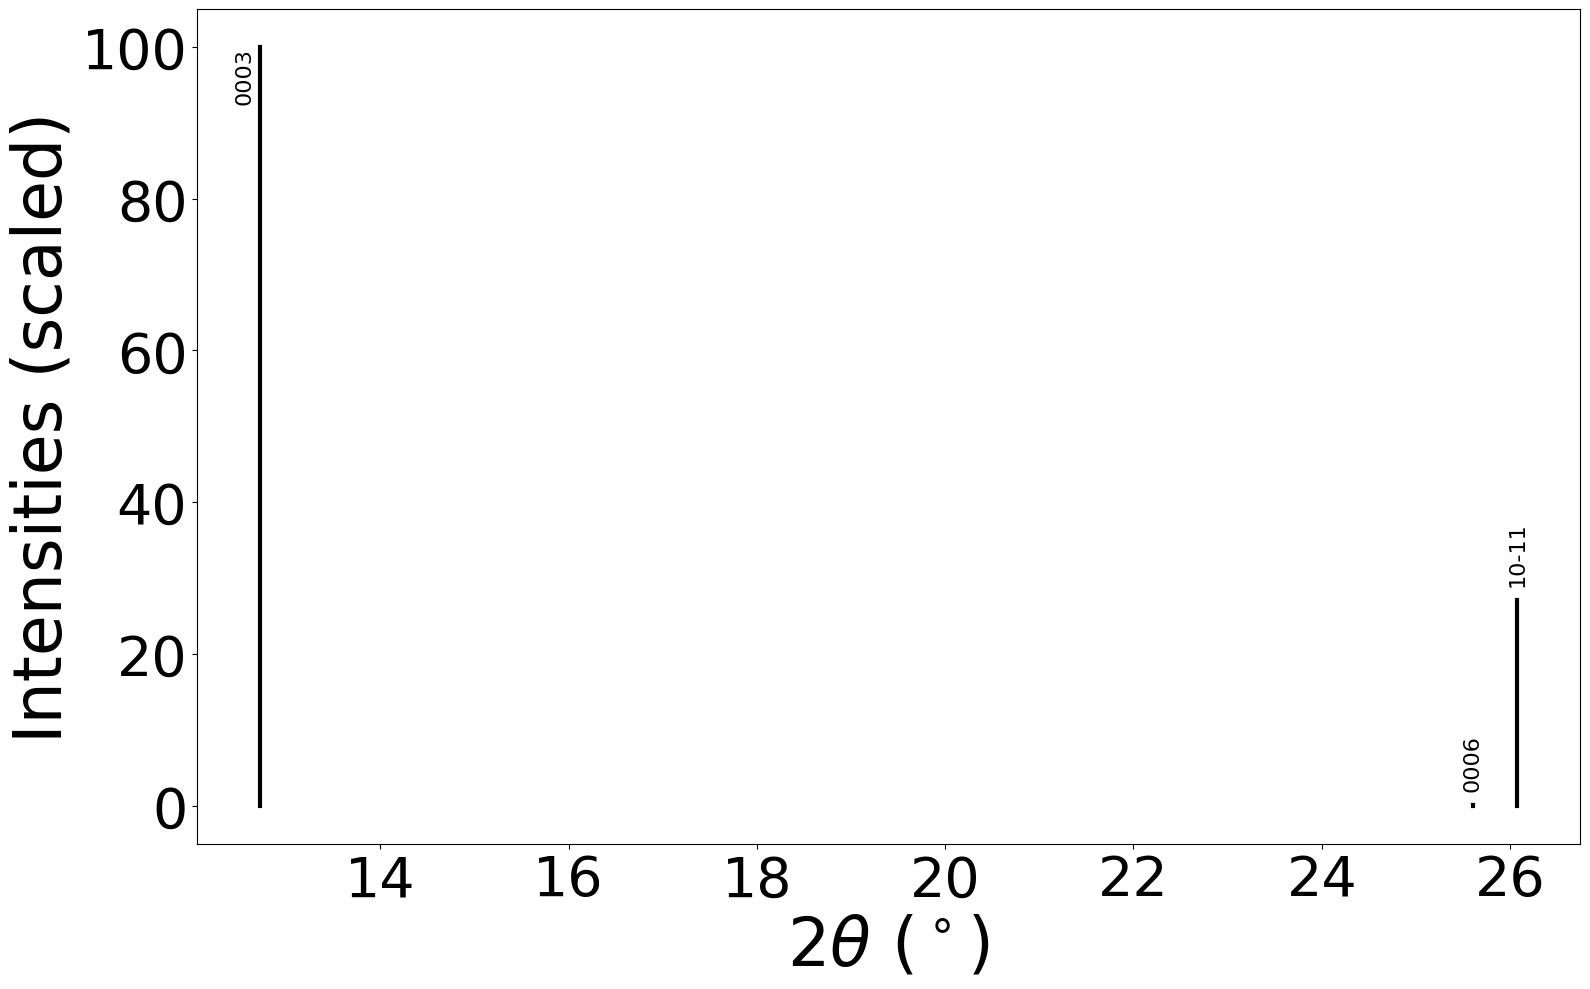

In [7]:
calculateur.get_plot(conventionnelle_structure,  two_theta_range=(0,27))